# Dammann gratings

We check how Dammann gratings work, which are diffraction grating with uniform efficiencies in a number of diffraction orders.

The definition of the grating can be seen in:  Bin Wu, Jiehu Kang, Wenqiang Han State "Design of Dammann grating based on the parallel recombination simulated annealing algorithm" Optik 124 (2013) 2928– 2931


In [1]:
from diffractio import np, sp, plt
from diffractio import um, mm, nm, degrees

from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XY import Scalar_mask_XY

## X Scheme

**One period**


In [2]:

period_size=40*um
x0=np.linspace(-period_size/2, period_size/2,128)
wavelength=0.6328*um

x_transitions = np.array([
    0, 0.201181, 0.250978, 0.326167, 0.370555, 0.372996, 0.396478, 0.453128,
    0.594731, 0.670591, 0.717718, 0.890632, 0.919921, 0.935546
])

x_transitions = (x_transitions - 0.5) * period_size

period = Scalar_mask_X(x=x0, wavelength=wavelength)
period.binary_code_positions(x_transitions=x_transitions,
                             start='down',
                             has_draw=False)
period.u = np.exp(1j * np.pi * period.u)

**N periods**

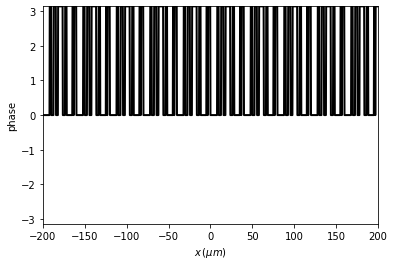

In [3]:
t_dammann = period.repeat_structure(
                                   num_repetitions=10,
                                   position='center',
                                   new_field=True)
t_dammann.draw('phase')

**Propagation at far field**

In [4]:
focal = 1 * mm
lens=Scalar_mask_X(x=t_dammann.x, wavelength=wavelength)
lens.lens(x0=0, focal=focal, radius=1*mm);

Good result: factor 5.12


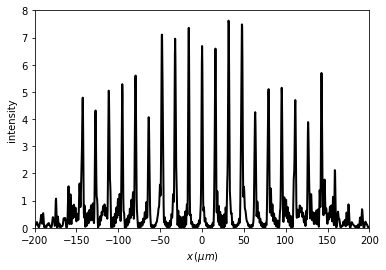

In [5]:
u_foco=t_dammann*lens
u_foco.RS(z=focal, new_field=False)
u_foco.draw()

**Around focal position**

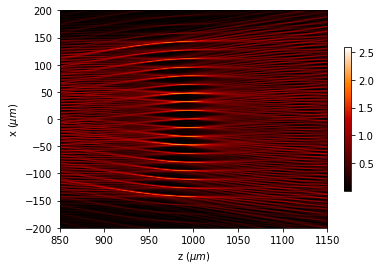

In [6]:
z0=np.linspace(focal-150*um,focal+150*um,512)
u_prop = Scalar_field_XZ(x=t_dammann.x,z=z0, wavelength=wavelength)
u_prop.incident_field(t_dammann*lens)

u_prop.RS()
u_prop.draw(kind='intensity', colorbar_kind='vertical', logarithm=True)


## XY Scheme

**Vertical grating**

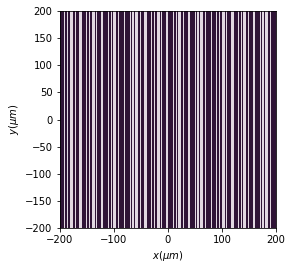

In [7]:
dammann_xy = Scalar_mask_XY(x=t_dammann.x, y=t_dammann.x, wavelength=wavelength)
dammann_xy.extrude_mask_x(t_dammann)
dammann_xy.draw('phase')

**Horizontal grating**

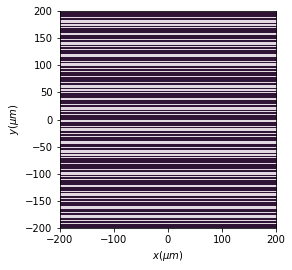

In [8]:
dammann_xy2 = Scalar_mask_XY(x=t_dammann.x, y=t_dammann.x, wavelength=wavelength)
dammann_xy2.extrude_mask_x(t_dammann)
dammann_xy2.rotate(angle=90*degrees)
dammann_xy2.draw('phase')

**Composed XY grating**

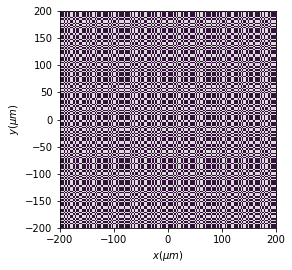

In [9]:
dammann_xy_total = dammann_xy * dammann_xy2
dammann_xy_total.draw('phase')


In [10]:
focal=0.75*mm
lens_2D = dammann_xy.duplicate(clear=True)
lens_2D.lens(r0=(0,0), radius=200*um, focal=focal, angle=0.0);


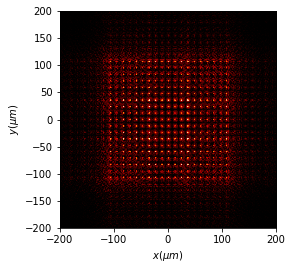

In [11]:
u_2d=dammann_xy_total*lens_2D
u_2d_focus=u_2d.RS(z=focal, verbose=True)
u_2d_focus.draw(logarithm=1)
